# Top TikTokers Analysis with Pandas and TensorFlow

Inflooence Sprint 2

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_csv('top-250-tiktokers.csv')
df

,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9m,38.3m,6.1m,16.60%,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7m,13.8m,2.8m,20.80%,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3m,17.6m,2.8m,16%,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3m,3.2m,622.6k,19.70%,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
4,5,@tiktok,U.S.A,45.3m,9.4m,503.0k,5.60%,1,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,@ramneeksingh1313,India,8.6m,479.1k,31.6k,6.70%,0,Male,35.0,South Asian,0.0,"Comedy, Acting",0.0
252,253,@amandacerny,U.S.A,8.6m,654.7k,95.2k,14.60%,0,Female,29.0,White,1.0,"Comedy, Lifestyle",0.0
253,254,@rahimabram,Russia,8.6m,1.6m,271.2k,17%,0,Male,22.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0
254,255,@johnnyorlando,U.S.A,8.6m,1.1m,245.4k,22.70%,0,Male,17.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0


In [3]:
numerical_features = ['Followers', 'Views', 'Likes', 'Engagement']

def preprocess_numerical_feature(raw_data, log=True):
    result = []
    for s in raw_data:
        if '%' in s:
            x = float(s.replace('%', ''))
        else:
            if 'm' in s:
                x = float(s.replace('m', ''))
                x *= 1000000
            elif 'k' in s:
                x = float(s.replace('k', ''))
                x *= 1000
            if log:
                x = math.log10(x)
        result.append(x)
    return result

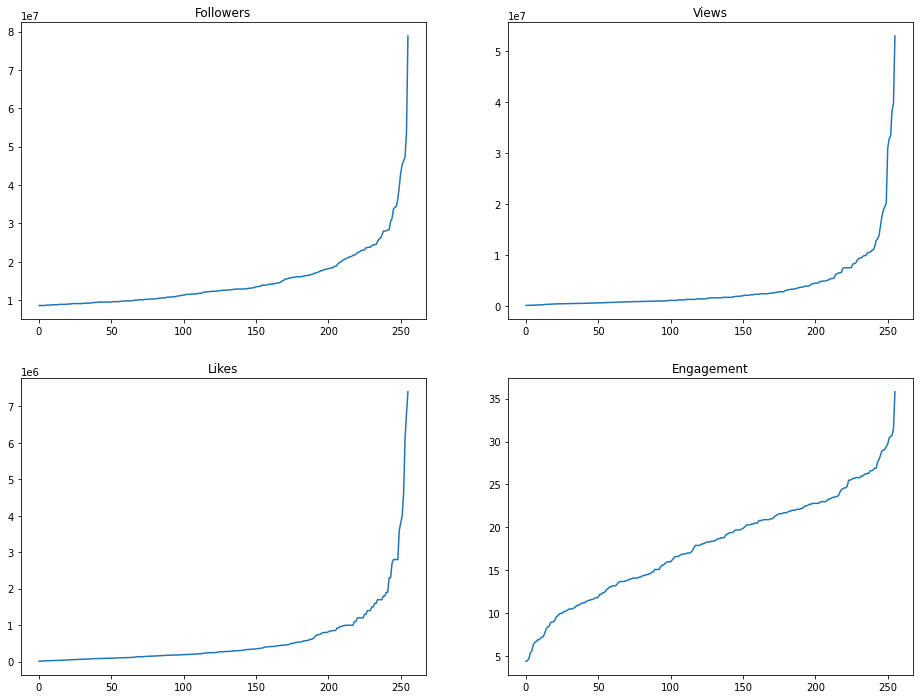

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, feature in enumerate(numerical_features):
    title = feature
    plot_data = sorted(preprocess_numerical_feature(df[feature], log=False))
    axes[i//2, i%2].set_title(title)
    axes[i//2, i%2].plot(plot_data)

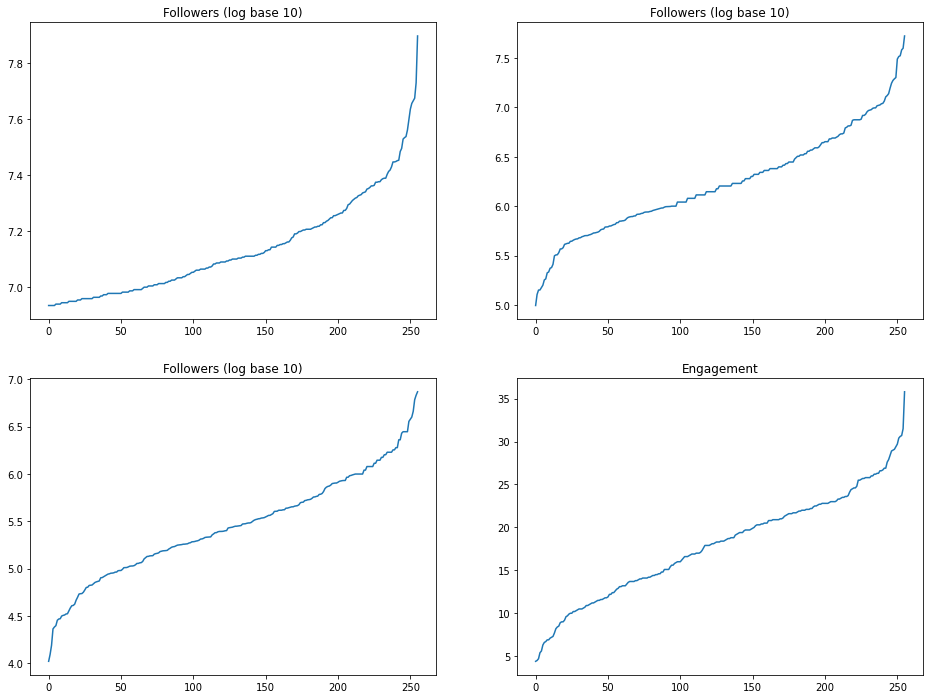

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, feature in enumerate(numerical_features):
    title = feature if feature=='Engagement' else 'Followers (log base 10)'.format(feature)
    plot_data = sorted(preprocess_numerical_feature(df[feature]))
    axes[i//2, i%2].set_title(title)
    axes[i//2, i%2].plot(plot_data)

In [6]:
train_dataset = np.transpose(np.asarray([preprocess_numerical_feature(df[f]) for f in numerical_features]))

In [7]:
input_dim = 3
output_dim = 1
hidden_dim = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_dim, input_shape=(input_dim,)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(output_dim),
])

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-3),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.RootMeanSquaredError()],
)

In [9]:
model.fit(x=train_dataset[:,1:], y=train_dataset[:,0], epochs=20)

Epoch 1/20
8/8 [==============================] - 2s 3ms/step - loss: 73.0349 - root_mean_squared_error: 8.5460
Epoch 2/20
8/8 [==============================] - 0s 2ms/step - loss: 42.3700 - root_mean_squared_error: 6.5092
Epoch 3/20
8/8 [==============================] - 0s 2ms/step - loss: 21.3892 - root_mean_squared_error: 4.6248
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 9.5060 - root_mean_squared_error: 3.0832
Epoch 5/20
8/8 [==============================] - 0s 2ms/step - loss: 4.3413 - root_mean_squared_error: 2.0836
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 3.3272 - root_mean_squared_error: 1.8241
Epoch 7/20
8/8 [==============================] - 0s 2ms/step - loss: 3.1572 - root_mean_squared_error: 1.7768
Epoch 8/20
8/8 [==============================] - 0s 2ms/step - loss: 2.9206 - root_mean_squared_error: 1.7090
Epoch 9/20
8/8 [==============================] - 0s 2ms/step - loss: 2.5150 - root_mean_squared_error: 1.585